## Analyses of Arabidopsis drought gene expression data
#### This notebook contains code on filtering the Arabidopsis drought exression dataframe, dimensionality reduction, surveying expression if individual genes, and machine learning. 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import re
import json
import csv
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy
plt.rcParams['pdf.fonttype'] = 42

In [3]:
df = pd.read_csv('rice_TPM.txt.tsv', sep='\t')
expr_df = df.set_index(df.columns[0])

In [4]:
expr_df.head()

,SRR11262961,SRR11262962,SRR11262963,SRR11262964,SRR11262965,SRR11262966,SRR11262967,SRR11262968,SRR11262969,SRR11262970,...,DRR006578,DRR006575,ERR6683510,ERR6683511,ERR6683509,ERR6683679,ERR6683682,DRR006691,ERR6683671,SRR2459247
GeneID,,,,,,,,,,,,,,,,,,,,,
OsKitaake01g000100,23.855084,23.127832,18.884610,27.233719,22.602130,23.095642,19.781580,15.088825,19.701887,19.141703,...,0.893394,4.756853,6.023118,5.976769,5.955273,3.191472,3.030896,1.356193,2.734700,0.0
OsKitaake01g000200,2.578522,3.028377,2.271365,1.464288,1.892034,2.629748,2.150470,1.771940,1.938828,1.902983,...,0.257284,0.859889,0.782896,1.239146,1.290717,0.119067,0.211923,1.255830,0.379707,0.0
OsKitaake01g000300,26.017847,24.447016,21.045127,22.594010,26.862695,22.453480,21.468514,17.881798,19.875805,18.419682,...,11.526054,9.237548,4.996785,4.863816,4.533837,2.189211,1.768921,11.571264,3.026605,0.0
OsKitaake01g000400,16.999999,14.596257,13.055111,15.070109,17.505485,20.985629,17.578460,16.255899,14.174687,14.099057,...,1.750696,3.586499,5.855472,8.397096,8.482213,5.614639,5.916134,3.967191,5.938455,0.0
OsKitaake01g000500,44.378887,39.998250,48.735321,42.190375,34.610351,40.360822,42.709645,53.904855,37.679055,42.066998,...,10.344825,24.822871,33.881803,35.703760,36.124972,29.842475,28.564588,23.270676,27.135807,0.0


In [5]:
expr_df.shape

(35411, 979)

In [1]:
batch = ['PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJEB21620', 'PRJEB21620', 'PRJEB21620', 'PRJEB21620', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJEB29280', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA562309', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608550', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA608552', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA609211', 'PRJNA613213', 'PRJNA613213', 'PRJNA613213', 'PRJNA613213', 'PRJNA616958', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA628020', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA635251', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA649154', 'PRJNA660861', 'PRJNA660861', 'PRJNA660861', 'PRJNA660861', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA667047', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA670511', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA248474', 'PRJNA701362', 'PRJNA701362', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA734967', 'PRJNA741840', 'PRJNA741840', 'PRJNA741840', 'PRJNA742504', 'PRJNA742504', 'PRJNA742504', 'PRJNA764445', 'PRJNA764445', 'PRJNA764445', 'PRJNA764445', 'PRJNA764445', 'PRJNA764445', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA805197', 'PRJNA809028', 'PRJNA809028', 'PRJNA809028', 'PRJNA809028', 'PRJNA822865', 'PRJNA822865', 'PRJNA822865', 'PRJNA280237', 'PRJNA280237', 'PRJNA280237', 'PRJNA280237', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA858295', 'PRJNA866990', 'PRJNA866990', 'PRJNA866990', 'PRJNA866990', 'PRJNA866990', 'PRJNA866990', 'PRJNA865102', 'PRJNA865102', 'PRJNA865102', 'PRJNA865102', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA914759', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA300502', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA301554', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA320054', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA319450', 'PRJNA340947', 'PRJNA340947', 'PRJNA340947', 'PRJNA340947', 'PRJNA340947', 'PRJNA359218', 'PRJNA359218', 'PRJNA359218', 'PRJNA359218', 'PRJNA359218', 'PRJNA359218', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA420056', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA449939', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA480902', 'PRJNA496614', 'PRJNA496614', 'PRJNA496614', 'PRJNA496614', 'PRJNA496614', 'PRJNA496614', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA506820', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA527848', 'PRJNA529258', 'PRJNA529258', 'PRJNA529258', 'PRJNA529258', 'PRJNA529258', 'PRJNA529258', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA530826', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA306542', 'PRJNA725109', 'PRJNA725109', 'PRJNA725109', 'PRJNA725109', 'PRJNA725109', 'PRJNA603607', 'PRJNA603607', 'PRJNA603607', 'PRJNA603607', 'PRJNA603607', 'PRJNA725109', 'PRJNA603607', 'PRJNA386172', 'PRJNA386172', 'PRJNA386172', 'PRJNA386172', 'PRJNA641365', 'PRJNA386172', 'PRJNA386172', 'PRJNA386172', 'PRJNA386172', 'PRJNA386172', 'PRJNA641365', 'PRJNA386172', 'PRJNA386172', 'PRJNA641365', 'PRJNA386172', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA314526', 'PRJNA294727', 'PRJDB2600', 'PRJNA314526', 'PRJNA294727', 'PRJNA294727', 'PRJDB2600', 'PRJEB47431', 'PRJNA294727', 'PRJNA281027', 'PRJNA294727', 'PRJNA281027', 'PRJNA272733', 'PRJDB2600', 'PRJNA272732', 'PRJNA272733', 'PRJNA272723', 'PRJEB47431', 'PRJEB47431', 'PRJNA281027', 'PRJNA294727', 'PRJNA272733', 'PRJNA272732', 'PRJEB47431', 'PRJDB2600', 'PRJNA272732', 'PRJNA272733', 'PRJNA272723', 'PRJDB2600', 'PRJNA272732', 'PRJNA272733', 'PRJNA272723', 'PRJNA272732', 'PRJNA272732', 'PRJNA272733', 'PRJNA272723', 'PRJNA321719', 'PRJNA281027', 'PRJDB2600', 'PRJNA272732', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJNA272732', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJNA281027', 'PRJDB2600', 'PRJNA321719', 'PRJNA321719', 'PRJDB2600', 'PRJEB47431', 'PRJEB47431', 'PRJNA281027', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJDB2600', 'PRJNA321719', 'PRJEB47431', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJDB2600', 'PRJNA321719', 'PRJEB47431', 'PRJNA356175', 'PRJEB47431', 'PRJNA356175', 'PRJNA272733', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJNA321719', 'PRJEB47431', 'PRJDB2600', 'PRJDB2600', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJDB2600', 'PRJDB2600', 'PRJDB2600', 'PRJEB47431', 'PRJEB47431', 'PRJNA272733', 'PRJDB2600', 'PRJDB2600', 'PRJDB2600', 'PRJDB2600', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJEB47431', 'PRJDB2600', 'PRJEB47431', 'PRJNA294727'
]

In [6]:
## Filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 10, :]
expr_df.shape

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 1).sum(axis=1) > 10
expr_df = expr_df.loc[mask_low_vals, :]

expr_df.shape

(31678, 979)

In [7]:
# Remove any SRA files with 0 mapped reads across all Arabidopsis genes
filtered_df = expr_df.loc[:, (expr_df != 0).any(axis=0)]
filtered_df.shape

(31678, 978)

In [8]:
# Create a function for log transforming expression data
def log_transform(df):
    log_df = df.copy() 
    
    for c in [c for c in log_df.columns if np.issubdtype(log_df[c].dtype , np.number)]:
        log_df[c] += 1
    for c in [c for c in log_df.columns if np.issubdtype(log_df[c].dtype , np.number)]:
        log_df[c] = np.log(log_df[c])
    return log_df

log_expr_df = log_transform(expr_df)
log_expr_df.head()

,SRR11262961,SRR11262962,SRR11262963,SRR11262964,SRR11262965,SRR11262966,SRR11262967,SRR11262968,SRR11262969,SRR11262970,...,DRR006578,DRR006575,ERR6683510,ERR6683511,ERR6683509,ERR6683679,ERR6683682,DRR006691,ERR6683671,SRR2459247
GeneID,,,,,,,,,,,,,,,,,,,,,
OsKitaake01g000100,3.213062,3.183366,2.989946,3.340517,3.161337,3.182031,3.034067,2.778125,3.030225,3.002792,...,0.638371,1.750391,1.949207,1.942586,1.939500,1.433052,1.393989,0.857047,1.317667,0.0
OsKitaake01g000200,1.274950,1.393364,1.185207,0.901903,1.061960,1.289163,1.147552,1.019547,1.078011,1.065739,...,0.228954,0.620517,0.578239,0.806095,0.828865,0.112495,0.192208,0.813518,0.321871,0.0
OsKitaake01g000300,3.296498,3.236598,3.093092,3.160993,3.327289,3.155019,3.112115,2.938198,3.038591,2.966287,...,2.527811,2.326062,1.791223,1.768801,1.710881,1.159774,1.018458,2.531414,1.392924,0.0
OsKitaake01g000400,2.890372,2.747031,2.642986,2.776961,2.918067,3.090389,2.922003,2.848154,2.719629,2.714632,...,1.011854,1.523117,1.925047,2.240401,2.249418,1.889285,1.933857,1.602854,1.937079,0.0
OsKitaake01g000500,3.815047,3.713529,3.906715,3.765618,3.572636,3.722334,3.777569,4.005602,3.655298,3.762757,...,2.428762,3.251261,3.551965,3.602879,3.614290,3.428893,3.386577,3.189269,3.337043,0.0


In [9]:
# Transpose the data so each row corresponds to an SRA numbers
expr_df_trans = expr_df.transpose()
log_expr_df_trans = log_expr_df.transpose()

log_expr_df_trans.head()


GeneID,OsKitaake01g000100,OsKitaake01g000200,OsKitaake01g000300,OsKitaake01g000400,OsKitaake01g000500,OsKitaake01g000600,OsKitaake01g000700,OsKitaake01g000800,OsKitaake01g000900,OsKitaake01g001000,...,OsKitaakeM050801,OsKitaakeM050802,OsKitaakeM050901,OsKitaakeM051001,OsKitaakeM051002,OsKitaakeM051101,OsKitaakeM051102,OsKitaakeM051202,OsKitaakeM051301,OsKitaakeM051501
SRR11262961,3.213062,1.274950,3.296498,2.890372,3.815047,3.222868,4.037641,0.399002,1.133020,4.392213,...,0.579810,0.0,0.0,0.0,2.654993,0.0,0.0,0.0,0.0,0.0
SRR11262962,3.183366,1.393364,3.236598,2.747031,3.713529,3.159582,3.937355,0.738394,1.206962,4.093694,...,0.580160,0.0,0.0,0.0,2.616782,0.0,0.0,0.0,0.0,0.0
SRR11262963,2.989946,1.185207,3.093092,2.642986,3.906715,3.253176,3.969479,0.362885,1.090514,3.832331,...,0.613720,0.0,0.0,0.0,2.736796,0.0,0.0,0.0,0.0,0.0
SRR11262964,3.340517,0.901903,3.160993,2.776961,3.765618,3.058660,3.918897,0.103825,1.066439,4.155257,...,0.468342,0.0,0.0,0.0,2.394174,0.0,0.0,0.0,0.0,0.0
SRR11262965,3.161337,1.061960,3.327289,2.918067,3.572636,3.026107,3.923658,0.172260,0.932222,4.102771,...,0.940705,0.0,0.0,0.0,2.858744,0.0,0.0,0.0,0.0,0.0


In [10]:
# Create a function to run the principal component analysis
from sklearn.decomposition import PCA

def apply_pca(data, num_c=2, return_pca=False):
    """
    data : data to fit PCA on
    num_c : Number of principal components for PCA
    return_pca : should the function also return the PCA object (for looking at things like explained variance ratio) 
    """
    pca = PCA(n_components=num_c)
    real_PCs = pca.fit_transform(data)
    real_PCs_df = pd.DataFrame(data=real_PCs, columns=[f'PC{i}' for i in range(1, num_c+1)])
    if return_pca:
        return real_PCs_df, pca
    else:
        return real_PCs_df

In [11]:
# Return the % of variation that PC1 and PC2 explain in our data
real_PCs_df = apply_pca(log_expr_df_trans)

log_real_PCs_df, log_pca = apply_pca(log_expr_df_trans, return_pca=True)
print(log_pca.explained_variance_ratio_)

[0.27894604 0.13083304]


In [15]:
# Import data labels for RNAseq data and create an index
raw_labels = pd.read_csv("labels.txt.txt", sep='\t')
raw_labels = raw_labels.set_index('Run')
raw_labels.head()

,BioProject,Treatment,Tissue,Genotype
Run,,,,
DRR006570,PRJDB2600,Control,NaN,NaN
DRR006571,PRJDB2600,Drought,NaN,NaN
DRR006572,PRJDB2600,Drought,NaN,NaN
DRR006573,PRJDB2600,Drought,NaN,NaN
DRR006574,PRJDB2600,Control,NaN,NaN


In [16]:
raw_labels.columns

Index(['BioProject', 'Treatment', 'Tissue', 'Genotype'], dtype='object')

In [17]:
# Relabel expression dataframe
labeling_rows = []

columns =[('BioProject', 'BioProject'), ('Genotype', 'Genotype'),
           ('Treatment', 'Treatment'), ('Tissue', 'Tissue')]
for srr in list(expr_df_trans.index):
    entry = raw_labels.loc[srr]
    row = {'Run' : srr}
    for old_colname, new_colname in columns:
        row[new_colname] = entry[old_colname]
    labeling_rows.append(row)

label_df = pd.DataFrame(labeling_rows)
label_df

,Run,BioProject,Genotype,Treatment,Tissue
0,SRR11262961,PRJNA609211,NaN,Drought,Leaf
1,SRR11262962,PRJNA609211,NaN,Drought,Leaf
2,SRR11262963,PRJNA609211,NaN,Drought,Leaf
3,SRR11262964,PRJNA609211,NaN,Drought,Leaf
4,SRR11262965,PRJNA609211,NaN,Drought,Leaf
...,...,...,...,...,...
974,ERR6683679,PRJEB47431,NaN,Control,Flag leaf
975,ERR6683682,PRJEB47431,NaN,Control,Flag leaf
976,DRR006691,PRJDB2600,NaN,Drought,NaN
977,ERR6683671,PRJEB47431,NaN,Control,Flag leaf


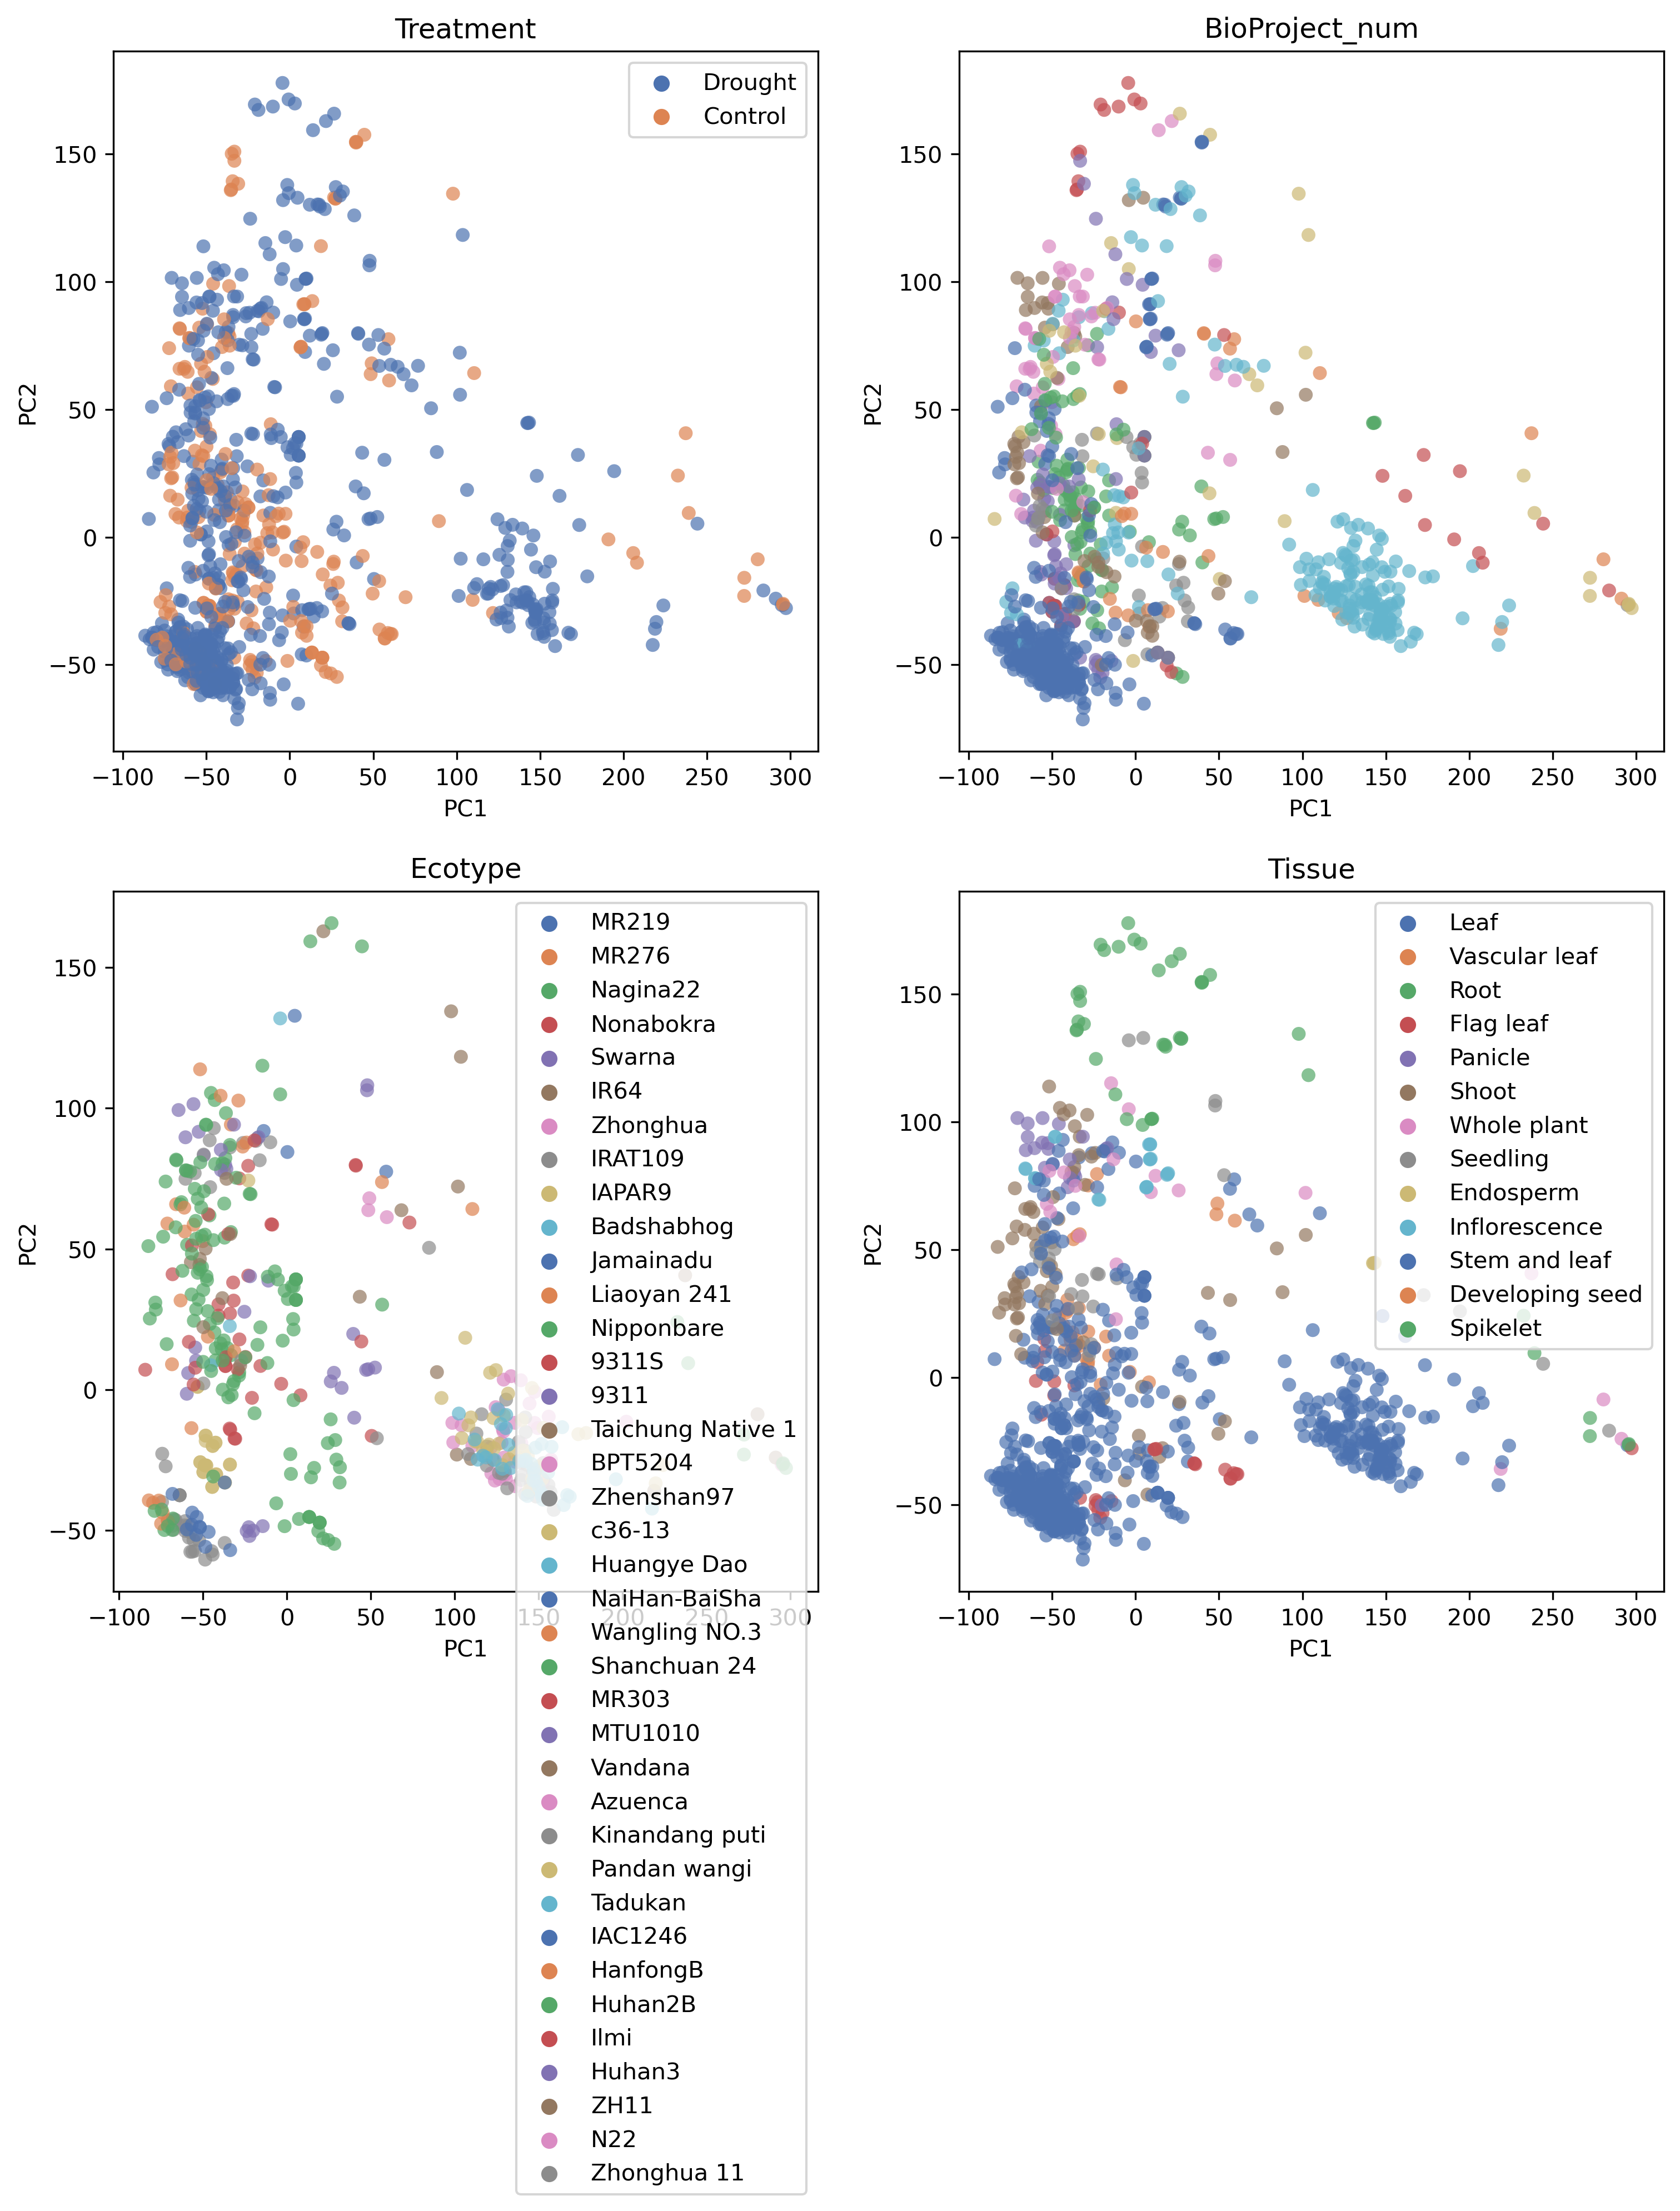

In [18]:
# Plot PCA by different factors

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(12, 12), dpi=300)
axs = axs.flatten()
def scatter_plot(df, x, y, ax, labels=None, title="", palette='deep'):
    sns.scatterplot(x=x, y=y, data=df,
                    ax=ax,
                    alpha=0.7, # opacity of the points
                    linewidth=0, # outline of the data points
                    hue=labels,
                    palette=palette)
    ax.set_title(title)
    
labels = label_df['Treatment'] 
labels2 = label_df['BioProject'] 
labels3 = label_df['Genotype'] 
labels4 = label_df['Tissue'] 

scatter_plot(real_PCs_df, 'PC1', 'PC2', axs[0], labels, "Treatment")
scatter_plot(real_PCs_df, 'PC1', 'PC2', axs[1], labels2, "BioProject_num")
scatter_plot(real_PCs_df, 'PC1', 'PC2', axs[2], labels3, "Ecotype")
scatter_plot(real_PCs_df, 'PC1', 'PC2', axs[3], labels4, "Tissue")

# Set legend visibility
axs[0].legend().set_visible(True)
axs[1].legend().set_visible(False)
axs[2].legend().set_visible(True)
axs[3].legend().set_visible(True)

plt.savefig('rice_drought_PCA.pdf')

# Plotting expression of individual drought marker genes 

In [14]:
log_expr_df_trans.head()

GeneID,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ATMG01275,ATMG01280,ATMG01290,ATMG01320,ATMG01330,ATMG01350,ATMG01360,ATMG01370,ATMG01400,ATMG01410
SRR13134698,1.973303,1.989720,1.251615,2.826614,4.469310,2.534552,2.442592,3.528407,4.589218,5.798741,...,0.615206,0.362489,0.000000,1.384015,1.735014,0.201441,1.335908,0.456568,0.0,0.0
SRR13134697,2.048443,1.943177,1.239523,2.770040,4.347145,2.626651,1.969062,3.505378,4.534910,6.013694,...,0.999145,0.268239,0.000000,0.000000,0.472994,0.000000,0.935013,1.028488,0.0,0.0
SRR13134696,1.979639,2.054015,1.250344,2.669067,4.454347,2.154850,1.922860,3.489413,4.439072,6.289056,...,0.000000,0.000000,0.387136,0.476009,0.000000,0.000000,0.696638,1.137097,0.0,0.0
SRR13134695,2.502394,2.772971,1.416568,2.811570,4.535323,1.971287,2.480335,3.167088,4.341457,6.193354,...,0.000000,0.236895,0.000000,0.860832,0.233221,0.000000,0.855508,0.310835,0.0,0.0
SRR13134694,2.742655,2.660737,1.824510,2.812586,4.285448,1.874525,1.947453,3.449664,4.343682,6.087006,...,0.000000,0.429225,0.000000,0.501084,1.666563,0.000000,0.813918,0.290220,0.0,0.0


In [15]:
raw_labels.head()

,Instrument,LibraryLayout,ReleaseDate,AvgSpotLen,BioProject,BioProject_num,Ecotype,Treatment,Tissue
Run,,,,,,,,,
SRR649737,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant
SRR649738,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant
SRR649739,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant
SRR649740,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant
SRR649741,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant


In [16]:
# Make a merged dataframe
merged_df = raw_labels.join(log_expr_df_trans)
merged_df.head()

,Instrument,LibraryLayout,ReleaseDate,AvgSpotLen,BioProject,BioProject_num,Ecotype,Treatment,Tissue,AT1G01010,...,ATMG01275,ATMG01280,ATMG01290,ATMG01320,ATMG01330,ATMG01350,ATMG01360,ATMG01370,ATMG01400,ATMG01410
Run,,,,,,,,,,,,,,,,,,,,,
SRR649737,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.605371,...,0.000000,0.098089,0.000000,0.536242,1.732519,0.225790,0.712171,1.604123,0.131800,0.081663
SRR649738,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.647334,...,0.147115,0.166753,0.000000,0.801274,1.412338,0.642851,0.911424,1.799970,0.138117,0.082966
SRR649739,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant,0.710782,...,0.000000,0.287461,0.239196,0.610988,1.435901,0.560044,0.813756,1.976193,0.000000,0.000000
SRR649740,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant,0.577279,...,0.496406,0.202127,0.227934,0.727516,1.883561,0.416614,0.892052,2.643055,0.000000,0.000000
SRR649741,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.656597,...,0.155148,0.199710,0.000000,0.449411,1.493359,0.566640,0.914285,2.065212,0.000000,0.000000


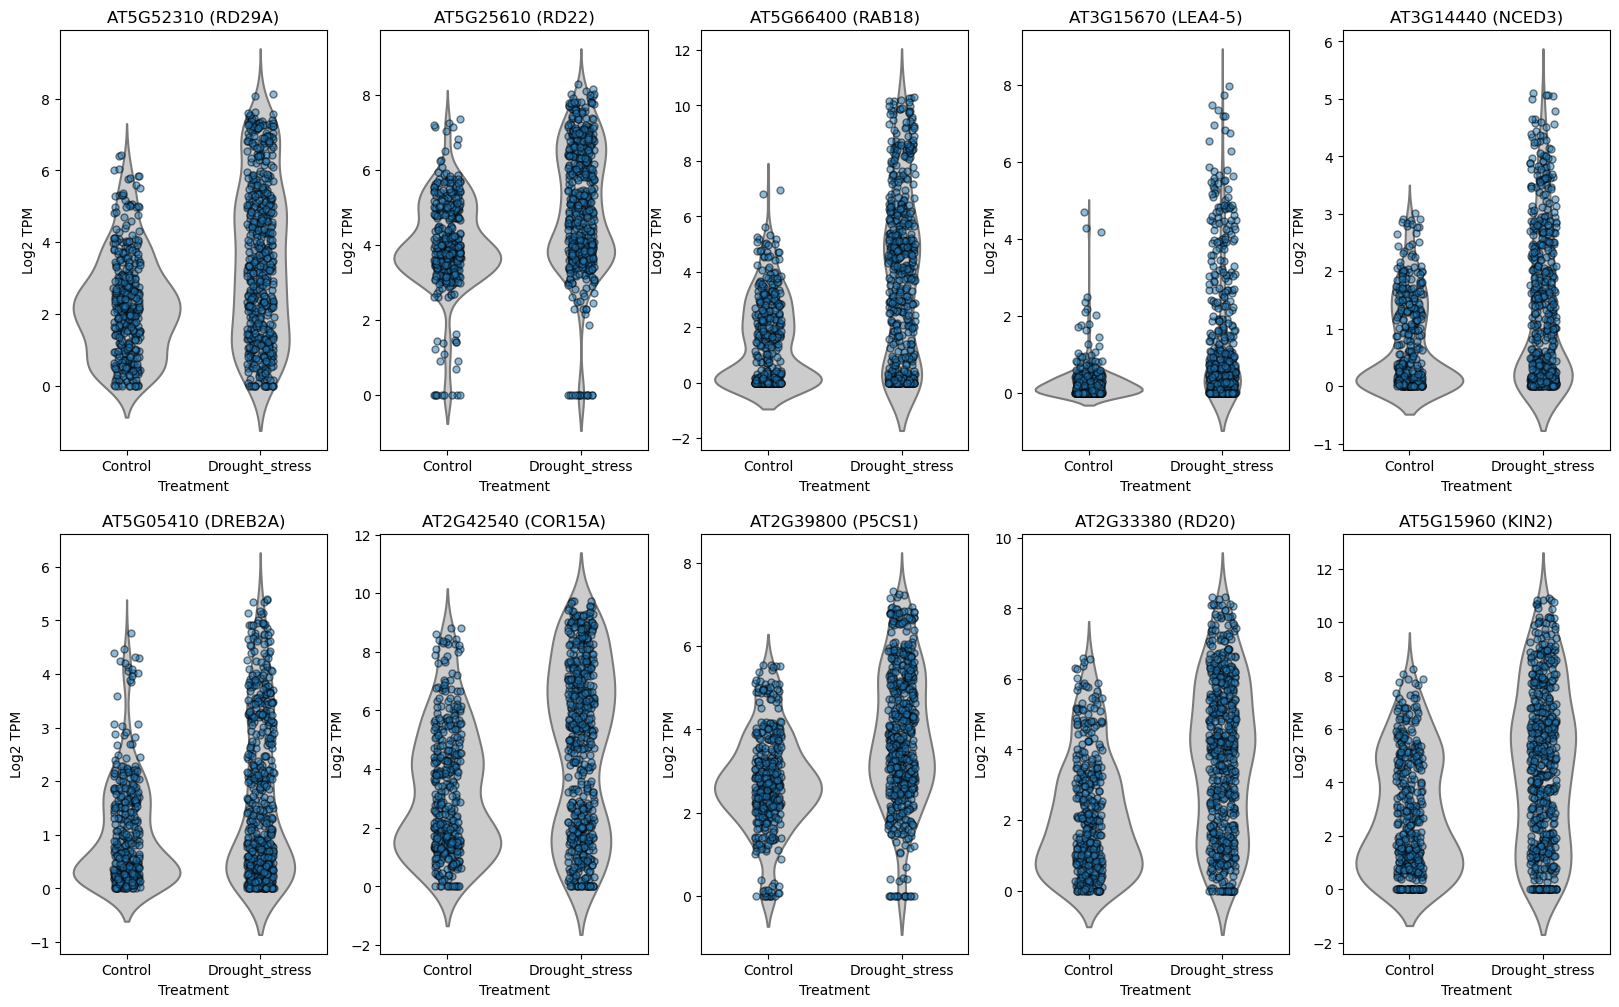

In [17]:
# Plotting a box plot on top of the violin plot

fig, axes = plt.subplots(2, 5, figsize=(20, 12))

sns.stripplot(x='Treatment', y='AT5G52310', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[0, 0])
sns.violinplot(x='Treatment', y='AT5G52310', data=merged_df, inner=None, color=".8", ax=axes[0, 0])

sns.stripplot(x='Treatment', y='AT5G25610', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[0, 1])
sns.violinplot(x='Treatment', y='AT5G25610', data=merged_df, inner=None, color=".8", ax=axes[0, 1])

sns.stripplot(x='Treatment', y='AT5G05410', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[1, 0])
sns.violinplot(x='Treatment', y='AT5G05410', data=merged_df, inner=None, color=".8", ax=axes[1, 0])

sns.stripplot(x='Treatment', y='AT2G42540', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[1, 1])
sns.violinplot(x='Treatment', y='AT2G42540', data=merged_df, inner=None, color=".8", ax=axes[1, 1])

sns.stripplot(x='Treatment', y='AT2G39800', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[1, 2])
sns.violinplot(x='Treatment', y='AT2G39800', data=merged_df, inner=None, color=".8", ax=axes[1, 2])

sns.stripplot(x='Treatment', y='AT2G33380', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[1, 3])
sns.violinplot(x='Treatment', y='AT2G33380', data=merged_df, inner=None, color=".8", ax=axes[1, 3])

sns.stripplot(x='Treatment', y='AT5G15960', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[1, 4])
sns.violinplot(x='Treatment', y='AT5G15960', data=merged_df, inner=None, color=".8", ax=axes[1, 4])

sns.stripplot(x='Treatment', y='AT5G66400', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[0, 2])
sns.violinplot(x='Treatment', y='AT5G66400', data=merged_df, inner=None, color=".8", ax=axes[0, 2])

sns.stripplot(x='Treatment', y='AT3G15670', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[0, 3])
sns.violinplot(x='Treatment', y='AT3G15670', data=merged_df, inner=None, color=".8", ax=axes[0, 3])

sns.stripplot(x='Treatment', y='AT3G14440', data=merged_df, edgecolor='black', linewidth=1, alpha=0.5, ax=axes[0, 4])
sns.violinplot(x='Treatment', y='AT3G14440', data=merged_df, inner=None, color=".8", ax=axes[0, 4])

axes[0, 0].set_title('AT5G52310 (RD29A)')
axes[0, 1].set_title('AT5G25610 (RD22)')
axes[1, 0].set_title('AT5G05410 (DREB2A)')
axes[1, 1].set_title('AT2G42540 (COR15A)')
axes[1, 2].set_title('AT2G39800 (P5CS1)')
axes[1, 3].set_title('AT2G33380 (RD20)')
axes[1, 4].set_title('AT5G15960 (KIN2)')
axes[0, 2].set_title('AT5G66400 (RAB18)')
axes[0, 3].set_title('AT3G15670 (LEA4-5)' )
axes[0, 4].set_title('AT3G14440 (NCED3)')

axes[0, 0].set_ylabel('Log2 TPM')
axes[0, 1].set_ylabel('Log2 TPM')
axes[1, 0].set_ylabel('Log2 TPM')
axes[1, 1].set_ylabel('Log2 TPM')
axes[1, 2].set_ylabel('Log2 TPM')
axes[1, 3].set_ylabel('Log2 TPM')
axes[1, 4].set_ylabel('Log2 TPM')
axes[0, 2].set_ylabel('Log2 TPM')
axes[0, 3].set_ylabel('Log2 TPM')
axes[0, 4].set_ylabel('Log2 TPM')

plt.savefig('Arabidopsis_drought_marker_violins.pdf')
plt.show()

<Axes: xlabel='AT5G66400', ylabel='Count'>

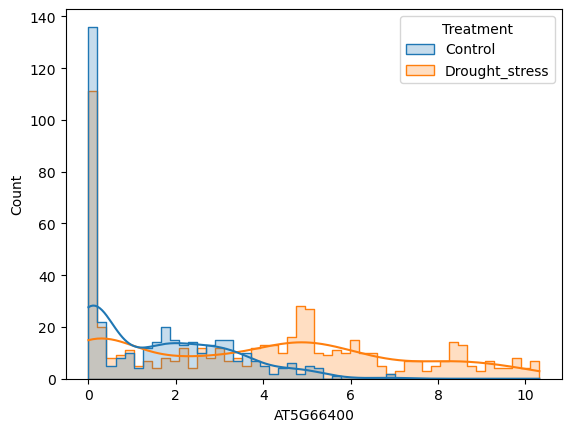

In [24]:
# Plotting historgram of an individual drought marker gene to look at the expression value distribution
sns.histplot(data=merged_df, x='AT5G66400', hue='Treatment', element='step', bins=50, kde=True)

<Axes: xlabel='AT2G39800', ylabel='Count'>

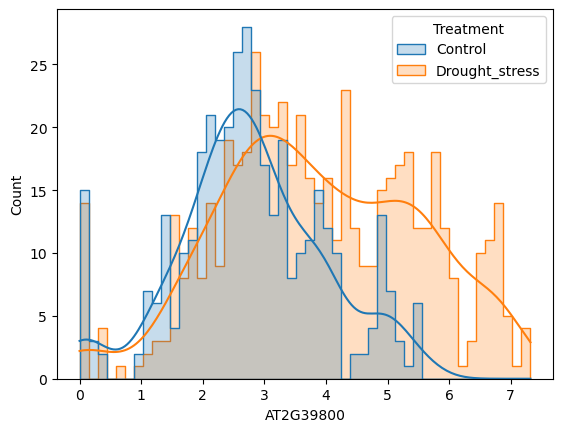

In [20]:
# Plotting historgram of an individual drought marker gene to look at the expression value distribution
#AT5G52310
#AT5G25610
#AT5G05410
#AT2G42540
#AT2G39800
#AT2G33380
#AT5G15960
#AT5G66400
#AT3G15670
#AT3G14440


In [ ]:
sns.histplot(data=merged_df, x='AT5G05410', hue='Treatment', element='step', bins=50, kde=True)

In [53]:
merged_df.head()

,Instrument,LibraryLayout,ReleaseDate,AvgSpotLen,BioProject,BioProject_num,Ecotype,Treatment,Tissue,AT1G01010,...,ATMG01275,ATMG01280,ATMG01290,ATMG01320,ATMG01330,ATMG01350,ATMG01360,ATMG01370,ATMG01400,ATMG01410
Run,,,,,,,,,,,,,,,,,,,,,
SRR649737,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.605371,...,0.000000,0.098089,0.000000,0.536242,1.732519,0.225790,0.712171,1.604123,0.131800,0.081663
SRR649738,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.647334,...,0.147115,0.166753,0.000000,0.801274,1.412338,0.642851,0.911424,1.799970,0.138117,0.082966
SRR649739,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant,0.710782,...,0.000000,0.287461,0.239196,0.610988,1.435901,0.560044,0.813756,1.976193,0.000000,0.000000
SRR649740,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Drought_stress,whole_plant,0.577279,...,0.496406,0.202127,0.227934,0.727516,1.883561,0.416614,0.892052,2.643055,0.000000,0.000000
SRR649741,Illumina_HiSeq_2000,SINGLE,2015,100,PRJNA186735,1.0,not_Col-0,Control,whole_plant,0.656597,...,0.155148,0.199710,0.000000,0.449411,1.493359,0.566640,0.914285,2.065212,0.000000,0.000000


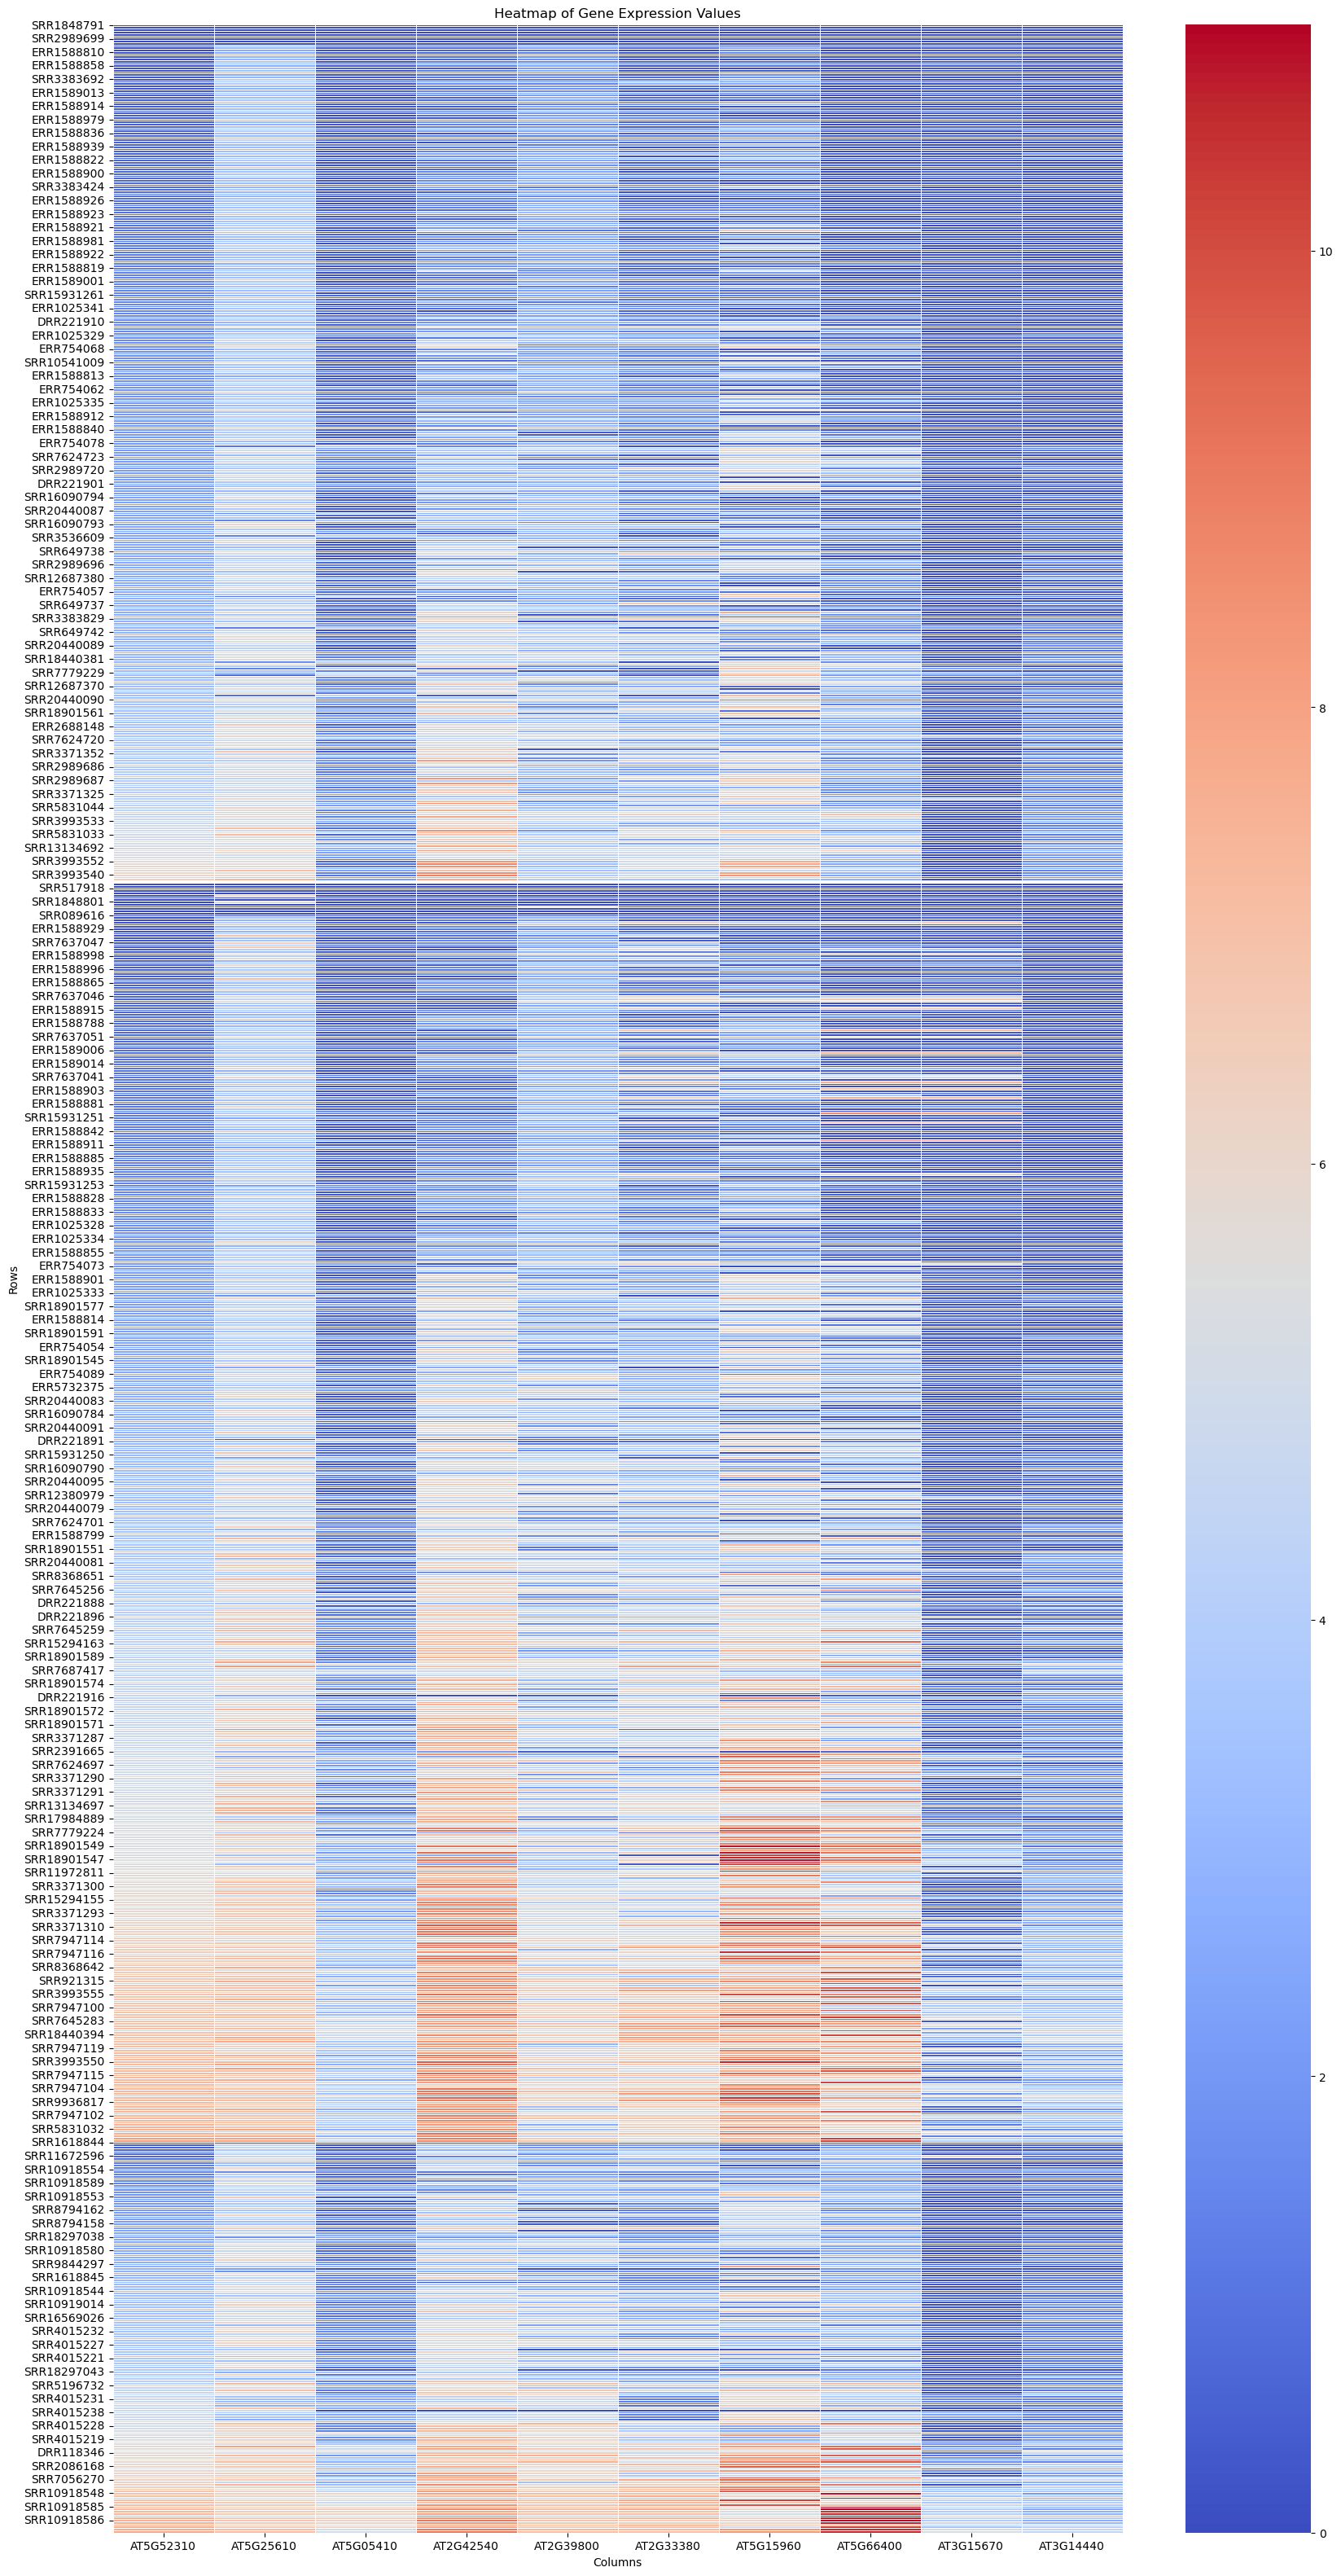

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'merged_df'
selected_columns = merged_df[["AT5G52310", "AT5G25610", "AT5G05410","AT2G42540", 'AT2G39800', 'AT2G33380', 'AT5G15960', 'AT5G66400', 'AT3G15670', 'AT3G14440']]
sorted_data = merged_df.sort_values(by=['Treatment', 'AT5G52310'], ascending=[True, True])

# Now, extract the sorted columns for the heatmap
sorted_selected_columns = sorted_data[["AT5G52310", "AT5G25610", "AT5G05410","AT2G42540", 'AT2G39800', 'AT2G33380', 'AT5G15960', 'AT5G66400', 'AT3G15670', 'AT3G14440']]

# Create the heatmap
plt.figure(figsize=(20,40))
sns.heatmap(sorted_selected_columns, cmap="coolwarm", annot=False, linewidths=.5)

# Add labels and a title
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Heatmap of Gene Expression Values")

# Show the plot
plt.show()